**Import libraries**: It imports required libraries such as `matplotlib`, `pandas`, `seaborn`, and various modules from the `sklearn` library for machine learning.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
import logging
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Set Up Logging**: It sets up logging to capture information and errors during the execution of the code.

In [2]:
logging.basicConfig(level=logging.INFO)

**Step 1: Data Preprocessing**


*   It loads the training and test datasets from text files using Pandas, removes any missing values and duplicates, and displays summary information about the datasets.
*   It visualizes the genre distribution and length distribution in the training data using plots generated with Matplotlib and Seaborn.



Load the dataset

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neuronexus Innovations/Neuronexus Innovations - Machine Learning/Movie Genre Classification/train_data.txt', sep=' ::: ', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python').dropna(subset=['DESCRIPTION']).drop_duplicates(subset=['DESCRIPTION']).reset_index(drop=True)
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neuronexus Innovations/Neuronexus Innovations - Machine Learning/Movie Genre Classification/test_data.txt', sep=' ::: ', names=['ID', 'TITLE', 'DESCRIPTION'], engine='python').reset_index(drop=True)

Print summary information about the datasets

In [4]:
for data, name in zip([train_data, test_data], ['Train Data', 'Test Data']):
    print(f"\n{name} Head:\n{data.head()}")
    print(f"\nDescription of {name}:\n{data.describe()}")
    print(f"\nInfo of {name}:\n{data.info()}")
    print(f"\nNull Values of {name}:\n{data.isnull().sum()}")


Train Data Head:
   ID                             TITLE     GENRE  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         DESCRIPTION  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  

Description of Train Data:
                 ID
count  54086.000000
mean   27092.467589
std    15651.637415
min        1.000000
25%    13533.250000
50%    27087.500000
75%    40647.750000
max    54214.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54086 entries, 0 to 54085
Data columns (total 4 columns):
 #   Column      

Visualize genre distribution in the training data

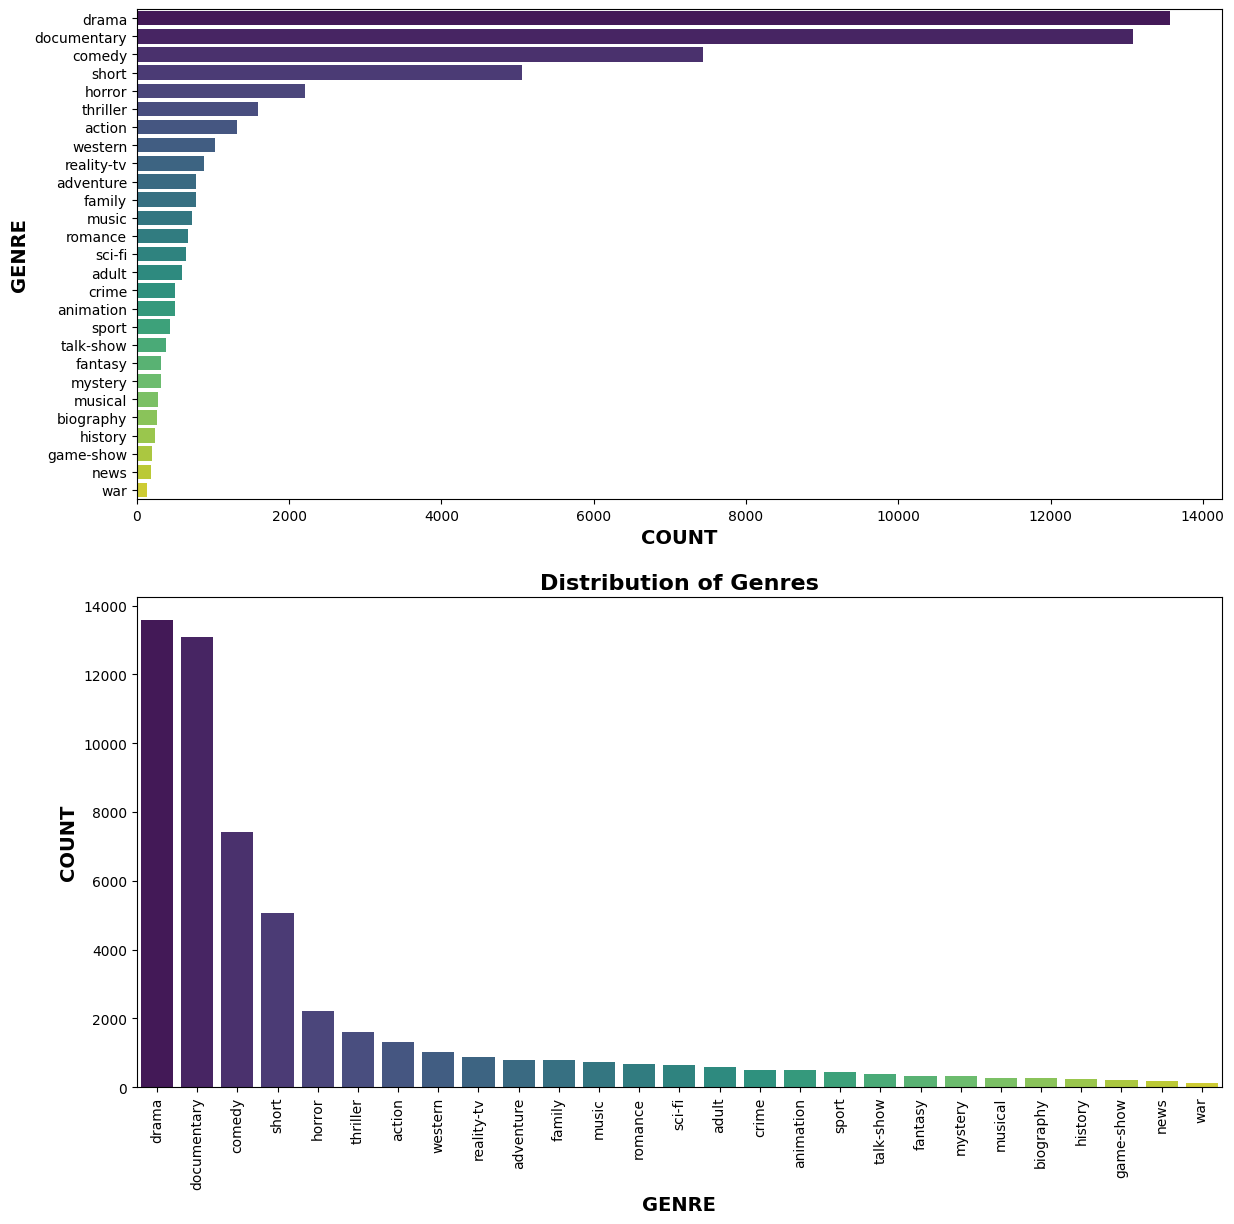

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(14, 14))
sns.countplot(data=train_data, y='GENRE', order=train_data['GENRE'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_xlabel('COUNT', fontsize=14, fontweight='bold')
axes[0].set_ylabel('GENRE', fontsize=14, fontweight='bold')

counts = train_data['GENRE'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis', ax=axes[1])
axes[1].set_xlabel('GENRE', fontsize=14, fontweight='bold')
axes[1].set_ylabel('COUNT', fontsize=14, fontweight='bold')
axes[1].set_title('Distribution of Genres', fontsize=16, fontweight='bold')
axes[1].tick_params(axis='x', labelrotation=90)
plt.show()

Add Length column to DataFrames

In [6]:
for data, name in zip([train_data, test_data], ['Train Data', 'Test Data']):
  data['Length'] = data['DESCRIPTION'].apply(len)
  print(f"\nLength of {name}'s Description:\n{data.head()}")


Length of Train Data's Description:
   ID                             TITLE     GENRE  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         DESCRIPTION  Length  
0  Listening in to a conversation between his doc...     545  
1  A brother and sister with a past incestuous re...     183  
2  As the bus empties the students for their fiel...     649  
3  To help their unemployed father make ends meet...    1081  
4  The film's title refers not only to the un-rec...     624  

Length of Test Data's Description:
   ID                        TITLE  \
0   1         Edgar's Lunch (1998)   
1   2     La guerra de papá (1977)   
2   3  Off the Beaten Track (2010)   
3   4       Meu Amigo Hindu (2015)   
4   5            Er nu zhai (1955)   

 

Visualize length distribution in the training data

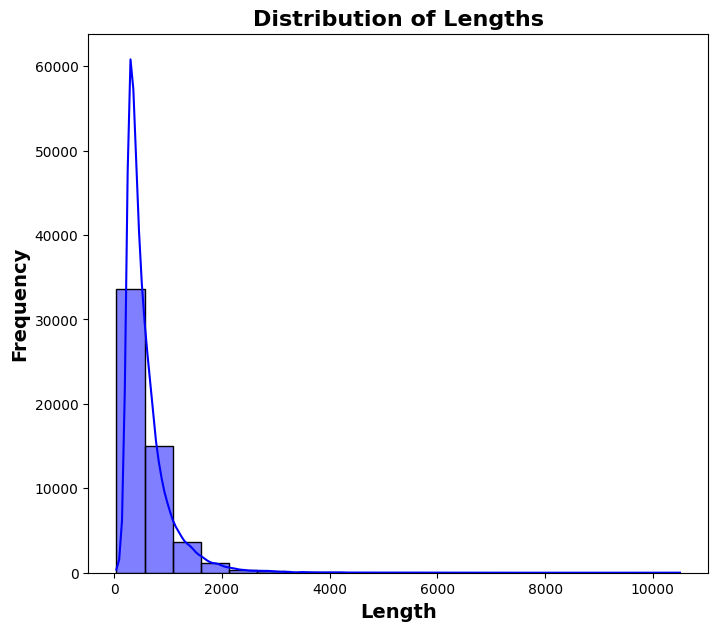

In [7]:
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='Length', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

**Tokenization and Splitting**: It tokenizes the descriptions and removes stopwords using TfidfVectorizer. Then, it splits the data into training and testing sets using the `train_test_split` function.

Tokenize descriptions and remove stopwords using TfidfVectorizer

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])
y = train_data['GENRE']

Split data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 2: Model Building with Hyperparameter Tuning**: It initializes and trains classifiers (`MultinomialNB` and `LogisticRegression`) with hyperparameter tuning using GridSearchCV.

Initialize and train the classifiers with hyperparameter tuning

In [10]:
clf = GridSearchCV(MultinomialNB(), param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]}, scoring='accuracy', cv=5)
logistic_clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0]}, scoring='accuracy', cv=5)
# svm_clf = GridSearchCV(SVC(), param_grid={'C': [0.1, 1.0, 10.0]})

"""
classifiers = {
    "Multinomial Naive Bayes": clf,
    "Logistic Regression": logistic_clf,
    "SVM": svm_clf
}
"""

classifiers = {
    "Multinomial Naive Bayes": clf,
    "Logistic Regression": logistic_clf
}

**Step 3: Model Training and Evaluation with Ensemble**: It fits the tuned classifiers, evaluates their performance using proper metrics, and logs the accuracy and classification reports.

Fit the tuned classifiers and evaluate with proper metrics

In [11]:
# svm_clf.fit(X_train, y_train)

for name, model in classifiers.items():
  try:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)  # Add zero_division parameter
    logging.info("%s - Accuracy: %.4f", name, accuracy)
    print(name, " - Accuracy:", accuracy)
    logging.info("%s - Classification Report:\n%s", name, report)
    print(name, "- Classification Report:\n", report)
  except Exception as e:
    logging.error("Training and evaluation of %s model failed: %s", name, str(e))

Multinomial Naive Bayes  - Accuracy: 0.4951931965243113
Multinomial Naive Bayes - Classification Report:
               precision    recall  f1-score   support

      action       0.40      0.07      0.11       260
       adult       1.00      0.02      0.03       121
   adventure       0.50      0.01      0.01       148
   animation       0.00      0.00      0.00        95
   biography       1.00      0.00      0.00        41
      comedy       0.49      0.32      0.39      1465
       crime       0.33      0.01      0.02       105
 documentary       0.55      0.86      0.67      2677
       drama       0.43      0.82      0.57      2717
      family       0.50      0.01      0.03       142
     fantasy       1.00      0.00      0.00        58
   game-show       0.94      0.39      0.56        38
     history       1.00      0.00      0.00        46
      horror       0.67      0.20      0.30       444
       music       0.72      0.21      0.32       141
     musical       1.00      

**Create a voting classifier for ensembling**: It creates a voting classifier to combine predictions from multiple models.

In [12]:
# voting_clf = VotingClassifier(estimators=[('nb', clf), ('lr', logistic_clf), ('svm', svm_clf)], voting='hard')
voting_clf = VotingClassifier(estimators=[('nb', clf), ('lr', logistic_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('nb',
                              GridSearchCV(cv=5, estimator=MultinomialNB(),
                                           param_grid={'alpha': [0.01, 0.1, 1.0,
                                                                 10.0]},
                                           scoring='accuracy')),
                             ('lr',
                              GridSearchCV(cv=5,
                                           estimator=LogisticRegression(max_iter=1000),
                                           param_grid={'C': [0.001, 0.01, 0.1,
                                                             1.0, 10.0]},
                                           scoring='accuracy'))])

**Evaluate the voting classifier**: It evaluates the voting classifier's performance and logs its accuracy and classification report.

In [13]:
try:
  y_pred_voting = voting_clf.predict(X_test)
  accuracy_voting = accuracy_score(y_test, y_pred_voting)
  report_voting = classification_report(y_test, y_pred_voting, zero_division=1)  # Add zero_division parameter
  logging.info("Voting Classifier - Accuracy: %.4f", accuracy_voting)
  print("Voting Classifier - Accuracy:", accuracy)
  logging.info("Voting Classifier - Classification Report:\n%s", report_voting)
  print("Voting Classifier - Classification Report:\n", report)
except Exception as e:
  logging.error("Evaluation of Voting Classifier model failed: %s", str(e))

Voting Classifier - Accuracy: 0.5388241819190238
Voting Classifier - Classification Report:
               precision    recall  f1-score   support

      action       0.30      0.16      0.21       260
       adult       0.61      0.21      0.31       121
   adventure       0.29      0.07      0.11       148
   animation       0.14      0.02      0.04        95
   biography       1.00      0.00      0.00        41
      comedy       0.46      0.50      0.48      1465
       crime       0.44      0.07      0.12       105
 documentary       0.65      0.81      0.72      2677
       drama       0.51      0.74      0.60      2717
      family       0.36      0.10      0.15       142
     fantasy       1.00      0.00      0.00        58
   game-show       0.81      0.45      0.58        38
     history       1.00      0.00      0.00        46
      horror       0.53      0.46      0.49       444
       music       0.67      0.35      0.46       141
     musical       0.45      0.10      0.1

**Step 4: Prediction and Output**: It makes predictions using all classifiers on the test data and outputs the predicted genres along with IDs and titles for all classifiers. The output is displayed as a DataFrame.

In [14]:
try:
    # Make predictions using all classifiers on test data
    X_test_data = tfidf_vectorizer.transform(test_data['DESCRIPTION'])

    """
    predictions = {
        "Multinomial Naive Bayes": clf.predict(X_test_data),
        "Logistic Regression": logistic_clf.predict(X_test_data),
        "SVM": svm_clf.predict(X_test_data),
        "Voting Classifier": voting_clf.predict(X_test_data)
    }
    """

    predictions = {
        "Multinomial Naive Bayes": clf.predict(X_test_data),
        "Logistic Regression": logistic_clf.predict(X_test_data),
        "Voting Classifier": voting_clf.predict(X_test_data)
    }

    # Output the predicted genres along with IDs and titles for all classifiers
    output_df = pd.DataFrame({
        'ID': test_data['ID'],
        'TITLE': test_data['TITLE'],
        **{f'PREDICTED_GENRE_{name}': prediction for name, prediction in predictions.items()}
    })
    print(output_df)

except Exception as e:
    logging.error("Prediction and output step failed: %s", str(e))

          ID                           TITLE  \
0          1            Edgar's Lunch (1998)   
1          2        La guerra de papá (1977)   
2          3     Off the Beaten Track (2010)   
3          4          Meu Amigo Hindu (2015)   
4          5               Er nu zhai (1955)   
...      ...                             ...   
54195  54196  "Tales of Light & Dark" (2013)   
54196  54197     Der letzte Mohikaner (1965)   
54197  54198             Oliver Twink (2007)   
54198  54199               Slipstream (1973)   
54199  54200       Curitiba Zero Grau (2010)   

      PREDICTED_GENRE_Multinomial Naive Bayes  \
0                                       drama   
1                                       drama   
2                                 documentary   
3                                       drama   
4                                       drama   
...                                       ...   
54195                                   drama   
54196                          

Overall, this code demonstrates a complete workflow for text classification using machine learning models and ensemble methods, including data preprocessing, model building, evaluation, and prediction.